In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.50d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.200d.txt
/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.100d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.300d.txt
/kaggle/input/sentiment-analysis-of-tweets/test_samples.txt
/kaggle/input/sentiment-analysis-of-tweets/train.txt


In [2]:
embeddings_index = {}
f = open('/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1: ], dtype = 'float32')
    embeddings_index[word] = coefs
 
f.close()
print(f'Total number of word vectors are {len(embeddings_index)}')

Total number of word vectors are 400000


In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing import text, sequence
from keras import layers
from sklearn import preprocessing 
import re

In [4]:
df_data = pd.read_csv("/kaggle/input/sentiment-analysis-of-tweets/train.txt")
df_test = pd.read_csv("/kaggle/input/sentiment-analysis-of-tweets/test_samples.txt")
X_df = df_data['tweet_text'].values
Y_df = df_data['sentiment'].values
le = preprocessing.LabelEncoder()
le.fit(Y_df)
y = le.transform(Y_df)
Y = keras.utils.to_categorical(y, 3)

In [5]:
def replace_unicodes(tweet):
    text = tweet.replace("\\u2019","'")
    text = text.replace("\\u002c",",")
    return text

xdf = df_data['tweet_text'].apply(replace_unicodes)

In [6]:
def preprocess(tweets):
    result = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",tweets).split())
    return result

xdf = xdf.apply(preprocess)

In [7]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())

def replace_contractions(tweet):
    text = expandContractions(tweet)
    return text

xdf = xdf.apply(replace_contractions)

In [8]:
Emoticons = {':‑)':'positive',':)':'positive',':-]':'positive',':]':'positive',':-3':'positive',':3':'positive',':->':'positive',
             ':>':'positive','8-)':'positive','8)':'positive',':-}':'positive',':}':'positive',':o)':'positive',':c)':'positive',
             ':^)':'positive','=]':'positive',":‑,":"positive",";D":"positive","(;":"positive",";‑)":"positive",";)":"positive",
             "*-)":"positive","*)":"positive",";‑]":"positive",";]":"positive",";^)":"positive","<3":"positive",
             ":'‑)":"extremely positive",":')":"extremely positive",':‑D':'extremely positive',':D':'extremely positive',
             '8‑D':'extremely positive','8D':'extremely positive','x‑D':'extremely positive','xD':'extremely positive',
             'X‑D':'extremely positive','XD':'extremely positive','=D':'extremely positive','=3':'extremely positive',
             'B^D':'extremely positive',':-))':'extremely positive',':))':'extremely positive',
             ':‑(':'negative',':(':'negative',':‑c':'negative',':c':'negative',
             ':‑<':'negative',':<':'negative',':‑[':'negative',':[':'negative',':-||':'negative','>:[':'negative',':{':'negative',
             ':@':'negative',':(':'negative',"</3":"negative","<\3":"negative",
             ":'‑(":"extremely negative",":'(":"extremely negative",
             ":‑O":"neutral",":O":"neutral",":‑o":"neutral",":o":"neutral",":-0":"neutral","8‑0":"neutral",">:O":"neutral"}

def replace_emoticons(tweet):
    words = tweet.split()
    reformed = [Emoticons[word] if word in Emoticons else word for word in words]
    text = " ".join(reformed)
    return text

xdf = xdf.apply(replace_emoticons)

In [9]:
import itertools

def remove_repetetion(tweet):
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    return text

xdf = xdf.apply(remove_repetetion)

In [10]:
import nltk
from nltk.corpus import stopwords
def remove_stopwords(tweets):
    data = [word for word in tweets.split() if word.lower() not in stopwords.words('english')]
    data = ' '.join(data)
    return data

In [11]:
xdf = xdf.apply(remove_stopwords)

In [12]:
max_features = 35000        # maximum number of word to keep

x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(xdf)
x = x_tokenizer.texts_to_sequences(xdf)
X = sequence.pad_sequences(x)

In [13]:
embedding_dim = 300
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index > max_features - 1:
        break
    else:    
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector           

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.10)

embedding_layer = layers.Embedding(max_features,embedding_dim, embeddings_initializer = keras.initializers.Constant(embedding_matrix),
                                    trainable = False)

In [15]:
model = keras.Sequential()
model.add(embedding_layer)
model.add(layers.SpatialDropout1D(0.4))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True, dropout = 0.1, recurrent_dropout = 0.1)))
model.add(layers.Conv1D(64, 3, activation = keras.activations.tanh))
model.add(layers.MaxPooling1D())
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(3, activation = keras.activations.relu)) 

model.add(layers.Dense(3, activation = keras.activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         10500000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 300)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         186880    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          24640     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [16]:
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'auto')

model.compile(loss = 'categorical_crossentropy', metrics=["accuracy"],
              optimizer = keras.optimizers.Adam(learning_rate = 0.001, epsilon = 1e-08))

his = model.fit(X_train, Y_train, epochs = 20, batch_size = 64, callbacks = [callback], validation_data=(X_val, Y_val))

Epoch 1/20
302/302 [==============================] - 767s 3s/step - loss: 1.0158 - accuracy: 0.4981 - val_loss: 0.9192 - val_accuracy: 0.5599
Epoch 2/20
302/302 [==============================] - 771s 3s/step - loss: 0.8860 - accuracy: 0.5746 - val_loss: 0.8546 - val_accuracy: 0.6046
Epoch 3/20
302/302 [==============================] - 774s 3s/step - loss: 0.8404 - accuracy: 0.6088 - val_loss: 0.8306 - val_accuracy: 0.6167
Epoch 4/20
302/302 [==============================] - 782s 3s/step - loss: 0.8132 - accuracy: 0.6284 - val_loss: 0.8084 - val_accuracy: 0.6223
Epoch 5/20
302/302 [==============================] - 778s 3s/step - loss: 0.7917 - accuracy: 0.6451 - val_loss: 0.8000 - val_accuracy: 0.6325
Epoch 6/20
302/302 [==============================] - 780s 3s/step - loss: 0.7750 - accuracy: 0.6511 - val_loss: 0.7915 - val_accuracy: 0.6390
Epoch 7/20
302/302 [==============================] - 764s 3s/step - loss: 0.7556 - accuracy: 0.6670 - val_loss: 0.8008 - val_accuracy: 0.6316

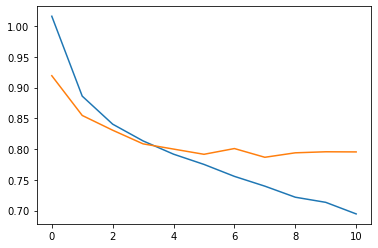

In [17]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

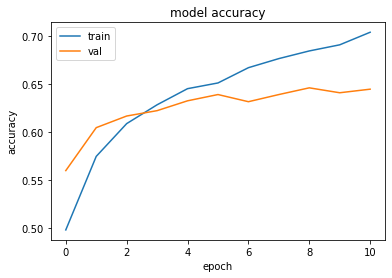

In [18]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
x_test = df_test['tweet_text'].apply(replace_unicodes)
x_test = x_test.apply(preprocess)
x_test = x_test.apply(replace_contractions)
x_test = x_test.apply(replace_emoticons)
x_test = x_test.apply(remove_repetetion)
x_test = x_test.apply(remove_stopwords)

In [20]:
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(x_test_tokenized)
Y_test = model.predict(X_test, batch_size = 64)
y_test = np.argmax(Y_test, axis = 1)
Y_test = list(le.inverse_transform(y_test))

In [21]:
df2 = pd.DataFrame({'tweet_id': df_test['tweet_id'].values,
                    'sentiment': Y_test})
df2.to_csv(r'/kaggle/working/Submission9.csv',index=False)